In [1]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup #For web scraping

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{
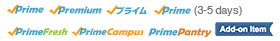

In [59]:
amazon_URL='https://www.amazon.com/Wireless-Cancelling-Bluetooth-Lightweight-Graphite/dp/B094242FV1/ref=sr_1_3?keywords=Galaxy%2Bbuds&s=aht&sr=1-3&th=1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url=amazon_product_url, headers=headers) 
soup = BeautifulSoup(page.content,'lxml') 
print(soup.prettify())

In [62]:
#Amazon
title = soup.find(id = 'productTitle')
text = title.get_text() # Will get text from html tags
product_title = text.strip() # Removing special characters like \n (newline)
print(product_title )

price = soup.find(class_ = 'a-price-whole')
price = price.get_text() # Will get text from html tags
amazon_product_price = price.strip() # Removing special characters like \n (newline)
print(amazon_product_price )



SAMSUNG Galaxy Buds 2 True Wireless Earbuds Noise Cancelling Ambient Sound Bluetooth Lightweight Comfort Fit Touch Control US Version, Graphite
109.


In [63]:
ebay_URL='https://www.ebay.com/itm/385502159656?hash=item59c1b82328:g:EcQAAOSwyOpkHvRu'
page = requests.get(url=ebay_product_url, headers=headers) 
soup = BeautifulSoup(page.content,'lxml') 
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <link href="//i.ebayimg.com" rel="dns-prefetch"/>
  <link href="//thumbs.ebaystatic.com" rel="dns-prefetch"/>
  <link href="//vi.vipr.ebaydesc.com" rel="dns-prefetch"/>
  <link href="//p.ebaystatic.com" rel="dns-prefetch"/>
  <link href="//q.ebaystatic.com" rel="dns-prefetch"/>
  <link href="//pics.ebaystatic.com" rel="dns-prefetch"/>
  <link href="//ir.ebaystatic.com" rel="dns-prefetch"/>
  <link href="//srx.main.ebayrtm.com" rel="dns-prefetch"/>
  <link href="//rover.ebay.com" rel="dns-prefetch"/>
  <link href="//reco.ebay.com" rel="dns-prefetch"/>
  <!--  fix for IE freezing.  -->
  <style type="text/css">
   body #Body .btn, body #Body c-std {
filter:none;
-ms-filter: "progid:DXImageTransform.Microsoft.gradient(startColorstr='#0079bc',endColorstr='#00509d')";
}
  </style>
  <meta name="viewport"/>
  <meta content="main" name="layout"/>
  <!-- Use ?

In [66]:
#ebay
title = soup.find(class_ = 'x-item-title__mainTitle')
text = title.get_text() # Will get text from html tags
product_title = text.strip() # Removing special characters like \n (newline)
print(product_title )

price = soup.find(class_ = 'ux-textspans ux-textspans--SECONDARY ux-textspans--BOLD')
price = price.get_text() # Will get text from html tags
ebay_product_price = price.strip() # Removing special characters like \n (newline)
print(ebay_product_price )

type


Samsung Galaxy Buds2 Wireless Earphones 2yr Manufacturer Warranty graphiteUK NEW
US $84.36


In [71]:
#Storing Data 

import pickle
def storeData():
   # initializing data to be stored in db
    amazon = {'key' : 'amazon', 'product_name' : 'Canon EOS M50', 'price' : amazon_product_price}
    ebay = {'key' : 'ebay', 'product_name' : 'Canon EOS M50', 'price' : ebay_product_price}

   # database
    db = {}
    db['amazon'] = amazon
    db['onbuy'] = onbuy

    
   # Its important to use binary mode
    dbfile = open('price_data', 'ab')
    
   # source, destination
    pickle.dump(db, dbfile)                    
    dbfile.close()

In [75]:
#Loading Stored Data
def read_data():
    dbfile = open('price_data', 'rb')    
    sb_store = pickle.load(dbfile)
    for items in db_store:
        print(items, ' :: ', db[items])
    dbfile.close()

In [88]:
amazon_product_price = str("amazon_product_price[1:]")
ebay_product_price = str("ebay_product_price[1:]")

In [84]:
max_price = max ("amazon_product_price","ebay_product_price")

type(amazon_product_price)


float

In [97]:
if max_price == "amazon_product_price":
    Company = "Amazon"
    amazon_URL = amazon_product_url
elif max_price == "ebay_product_price":
    Company = "eBay"
    ebay_URL = ebay_product_url
else:
    Company = "Unknown"
    print("Error: Invalid max_price value")



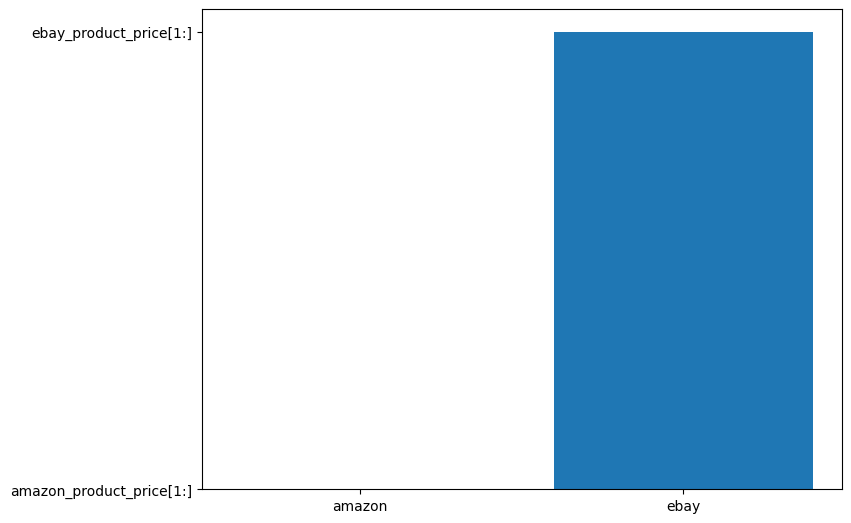

In [99]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['amazon','ebay']
students=[amazon_product_price,ebay_product_price]
ax.bar(langs,students)
plt.show()